In [12]:
import os
import pandas as pd
import numpy as np
import biosignalsnotebooks as bsnb
from numpy import linspace, diff, zeros_like, arange, array
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import correlate
import scipy as sp
from scipy.signal import find_peaks
import math
from scipy import signal as scisig
from scipy import stats
import neurokit2 as nk
import statistics
import statsmodels
%run Pan_Tomkins_Algorithm_Final.ipynb


In [13]:
def tost_paired(y, x, low, upp, transform=None):
    '''test of (non-)equivalence for paired sample
    TOST: two one-sided t tests
    null hypothesis  x - y < low or x - y > upp
    alternative hypothesis:  low < x - y < upp
    If the pvalue is smaller than a threshold, then we reject the hypothesis
    that there is difference between the two samples larger than the one
    given by low and upp.
    Parameters
    ----------
    y, x : array_like
        two paired samples
    low, upp : float
        equivalence interval low < x - y < upp
    transform : None or function
        If None (default), then the data is not transformed. Given a function
        sample data and thresholds are transformed. If transform is log the
        the equivalence interval is in ratio: low < x / y < upp
    Returns
    -------
    pvalue : float
        pvalue of the non-equivalence test
    t1, pv1 : tuple of floats
        test statistic and pvalue for lower threshold test
    t2, pv2 : tuple of floats
        test statistic and pvalue for upper threshold test
    Notes
    -----
    tested on only one example
    uses stats.ttest_1samp which doesn't have a real one-sided option
    '''
    if transform:
        y = transform(y)
        x = transform(x)
        low = transform(low)
        upp = transform(upp)
    t1, pv1 = stats.ttest_1samp(x - y, low)
    t2, pv2 = stats.ttest_1samp(x - y, upp)
    return max(pv1, pv2)/2., (t1, pv1 / 2.), (t2, pv2 / 2.)
    


(0.0, 5000.0, -1000.0, 2000.0)

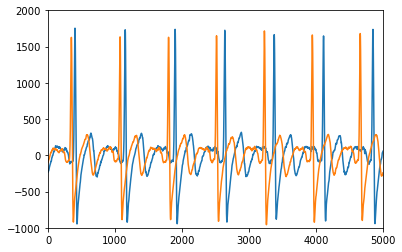

In [53]:
ecg_data = pd.read_csv ('./database/new_ecg_data/small_sample.csv')
control_data = ecg_data['Control'].tolist()
diabetic_1 = ecg_data['Diabetic_1'].tolist()
sr = 1000

plt.plot(control_data)
plt.plot(diabetic_1)
plt.axis([0, 5000, -1000, 2000])

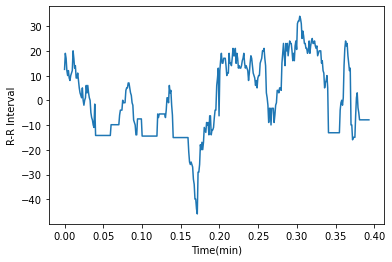

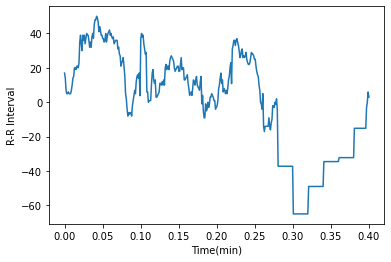

In [54]:
control_peaks = _pantompkins(control_data,sr)
peaks_1 = _pantompkins(diabetic_1,sr)

_hrvreading(control_peaks)
_hrvreading(peaks_1)

In [60]:
def _tost_test(peaks_1,peaks_2):
    peaks_both = [peaks_1, peaks_2]
    peaks_lim = []
    tost_values = pd.DataFrame()
    for peaks in peaks_both:
        peaks_temps = []
        length = len(peaks)
        med_length = round(length/2,0)
        peaks_lower = int(med_length - 200)
        peaks_temps.append(peaks_lower)
        peaks_upper = int(med_length + 200)
        peaks_temps.append(peaks_upper)
        peaks_temps.append(peaks)
        peaks_lim.append(peaks_temps)
    
    tost = tost_paired((peaks_lim[0][2])[peaks_lim[0][0]:peaks_lim[0][1]],(peaks_lim[1][2])[peaks_lim[1][0]:peaks_lim[1][1]], 0.8, 1.25, transform=None)
    return tost

tost = _tost_test(peaks_1,control_peaks)
if tost[0] < 0.05:
    print("The data is similiar at a significant level of 0.05 with a p_value equal to:" + str(tost[0]) + ".")


The data is similiar at a significant level of 0.05 with a p_value equal to:2.2724200981550098e-98.
